In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

**reading csv file with specific columns**

In [ ]:
data = pd.read_csv("/content/JIRA (2).csv",usecols = ['Summary','Issue Type','Status','Assignee','Priority','Created','Description','Comment'])

**checking the shape of dataset**

In [ ]:
data.shape

(1000, 8)

**reading first five records in csv file**

In [ ]:
data.head()

,Summary,Issue Type,Status,Priority,Assignee,Created,Description,Comment
0,LSU FV: Store cross cache misaligned with 2nd ...,Bug,Open,Medium,John Ingalls,9/27/2022 20:41,"Hi John, \n\nI am observing a fail for followi...",NaN
1,[TGV] Assertion Failure: ROB Retire Hang aroun...,Bug,In Progress,Medium,Nicolas Brunie,9/27/2022 8:07,*Debug info* \nwhile tracing back we find that...,27/Sep/22 8:23 AM;6065017e90e3950069cf01c5;Whi...
2,[HB] LSU: investigate freeing LSIssQ early,Task,Open,Medium,Lucas Garcia,9/27/2022 7:45,LSIssQ entries are kept alive until we are sur...,NaN
3,[HB] LSU: check all issue queue replay/wakeup ...,Task,Open,Medium,Lucas Garcia,9/27/2022 7:37,Some replay are with wakeup and some replay im...,NaN
4,Investigate Power differences between P650 PRF...,Task,In Progress,Medium,Julian Bailey,9/27/2022 6:19,"From the Healdsburg Power Discussions, run the...",27/Sep/22 9:33 AM;629ab2a89bc7150068d00cdf;Add...


**retreiving the column names and storing in lst**

In [ ]:
lst = data.columns

In [ ]:
lst

Index(['Summary', 'Issue Type', 'Status', 'Priority', 'Assignee', 'Created',
       'Description', 'Comment'],
      dtype='object')

**checking the number of records in different categories of Issue type column**

In [ ]:
data['Issue Type'].value_counts()

Task        570
Bug         340
Epic         44
Sub-task     41
Question      5
Name: Issue Type, dtype: int64

**visualizing the number of records in Issue type**

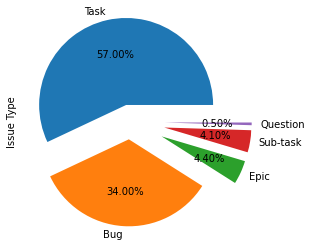

In [ ]:
data['Issue Type'].value_counts().plot.pie(autopct='%1.2f%%',explode = [0.2,0.2,0.4,0.4,0.4])

There are 34% of records containing the BUG in Issue Type column

**dropping the records which are not "BUG" in issue type column**


In [ ]:
i = data[(data['Issue Type'] != 'Bug')].index
data = data.drop(i,axis=0)

**now checking the number of records after dropping other than bug**

In [ ]:
data.shape[0]

340

**checking the number of records in different category of Status**

In [ ]:
data['Status'].value_counts()

Resolved       197
Closed         131
In Progress      7
Open             5
Name: Status, dtype: int64

**visualizing the number of records in Status**

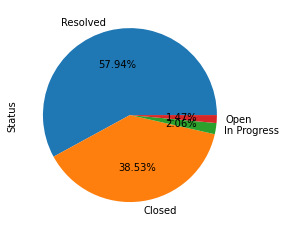

In [ ]:
data['Status'].value_counts().plot.pie(autopct='%1.2f%%')

**checking the number of records in different category of Priority**

In [ ]:
data['Priority'].value_counts()

Medium         304
High            13
Highest         13
Low              7
Showstopper      3
Name: Priority, dtype: int64

**visualizing the number of records in Priority**

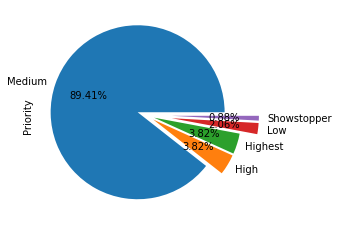

In [ ]:
data['Priority'].value_counts().plot.pie(autopct='%1.2f%%',explode=[0.1,0.1,0.1,0.3,0.3])

**checking the Assignee names**

In [ ]:
l = list(data['Assignee'].unique())
l

['John Ingalls',
 'Nicolas Brunie',
 'Satish Bhavanari',
 'Yohann Rabefarihy',
 'Srivatsa Yogendra',
 'Jeffrey Huang',
 'David Kravitz',
 'Andrew Hanselman',
 'Ishita Shah',
 'Kira Tsao',
 'Binayak Tiwari',
 'Brad Wu',
 'Alexandre Solomatnikov',
 'Steffen Kunze',
 'Naveen Rathore',
 'Julian Bailey',
 'Adam George',
 'Abderrahmane Sensaoui',
 'Cyril Bresch',
 'Anthony Hung',
 'Deepika S K',
 'Shaka Kao',
 'Saurabh Singh',
 'Josh Smith',
 'Lance Huang',
 'Krishnendu Patra',
 'Warren Menezes',
 'Erdinc Ozturk',
 'Khondakar Mujtaba',
 'Dave Parry',
 'Alvin Tung',
 'Rick Chen']

**checking the number of records for each Assignee**

In [ ]:
data['Assignee'].value_counts()

Nicolas Brunie            82
John Ingalls              53
David Kravitz             31
Andrew Hanselman          26
Kira Tsao                 23
Josh Smith                17
Alexandre Solomatnikov    14
Adam George               14
Yohann Rabefarihy         13
Naveen Rathore            10
Binayak Tiwari             8
Brad Wu                    7
Srivatsa Yogendra          6
Saurabh Singh              6
Ishita Shah                4
Rick Chen                  4
Abderrahmane Sensaoui      3
Warren Menezes             3
Shaka Kao                  2
Deepika S K                2
Julian Bailey              1
Cyril Bresch               1
Anthony Hung               1
Jeffrey Huang              1
Steffen Kunze              1
Satish Bhavanari           1
Lance Huang                1
Krishnendu Patra           1
Erdinc Ozturk              1
Khondakar Mujtaba          1
Dave Parry                 1
Alvin Tung                 1
Name: Assignee, dtype: int64

**Visualizing the Assignee column**

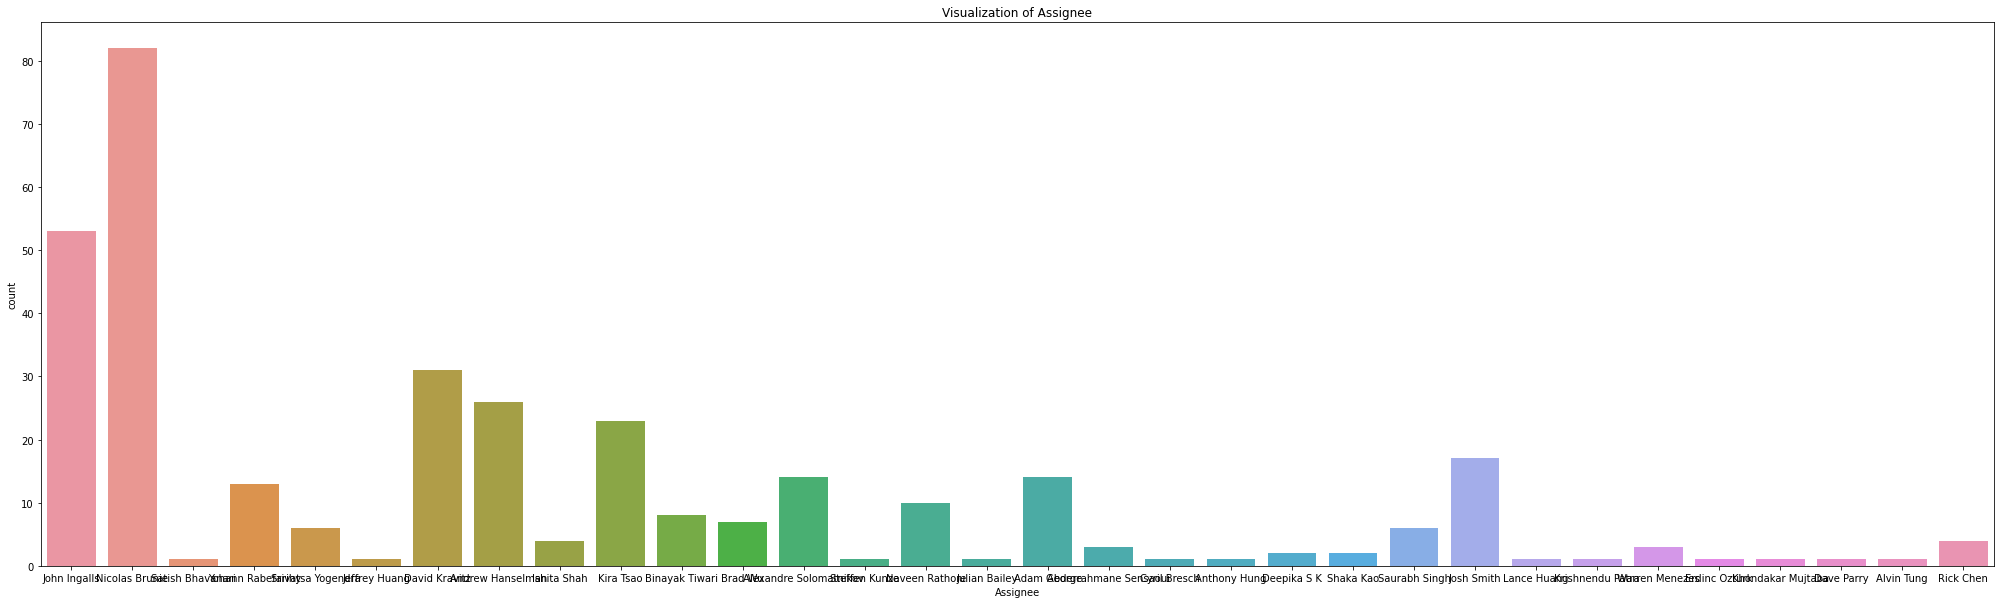

In [ ]:
ind = data['Assignee'].value_counts().index
val = data['Assignee'].value_counts().values


plt.figure(figsize=(35,10))
plt.title("Visualization of Assignee")
plt.xlabel("Assignee Names")
plt.ylabel("Assignee count")

sns.countplot(x="Assignee",data=data)

**creating a dataframe of 3 columns from data**

In [ ]:
df = data[['Assignee','Priority','Status']]

**checking the different priority count for each Assignee**

In [ ]:
df.groupby(['Assignee','Priority']).size().reset_index()

,Assignee,Priority,0
0,Abderrahmane Sensaoui,High,1
1,Abderrahmane Sensaoui,Medium,2
2,Adam George,High,1
3,Adam George,Low,2
4,Adam George,Medium,11
5,Alexandre Solomatnikov,Medium,14
6,Alvin Tung,Medium,1
7,Andrew Hanselman,High,2
8,Andrew Hanselman,Highest,6
9,Andrew Hanselman,Medium,18


**Visualizing the differnt priority count for each Assignee**

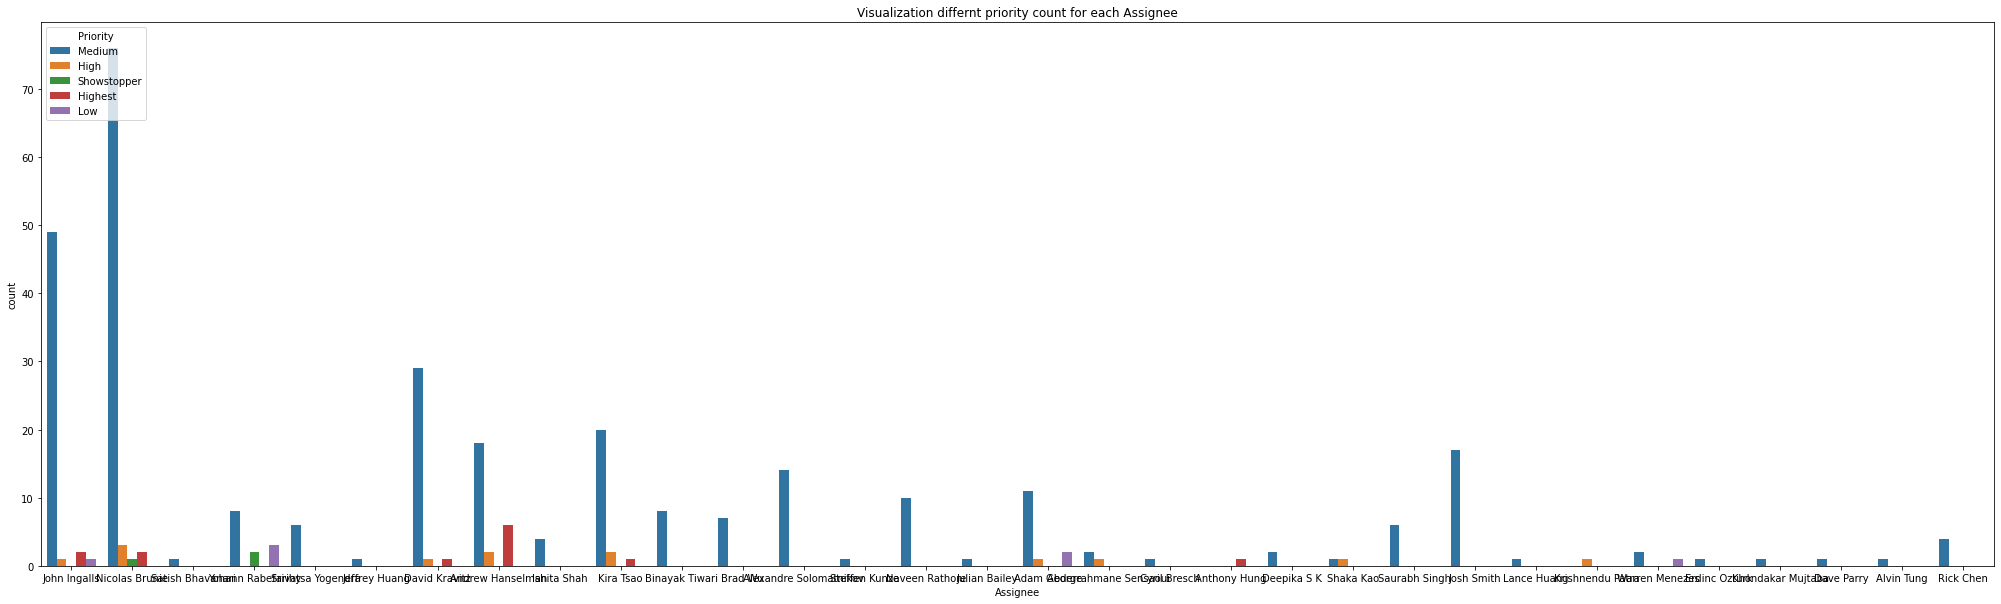

In [ ]:
plt.figure(figsize=(35,10))
plt.title("Visualization differnt priority count for each Assignee")
plt.xlabel("Assignee Names")
plt.ylabel("Priority count")
sns.countplot(x="Assignee",data=data,hue='Priority')

**checking the Status for each Assignee**

In [ ]:
df.groupby(['Assignee','Status']).size().reset_index()

,Assignee,Status,0
0,Abderrahmane Sensaoui,In Progress,2
1,Abderrahmane Sensaoui,Open,1
2,Adam George,Closed,1
3,Adam George,Resolved,13
4,Alexandre Solomatnikov,Closed,10
5,Alexandre Solomatnikov,Resolved,4
6,Alvin Tung,Closed,1
7,Andrew Hanselman,Closed,7
8,Andrew Hanselman,In Progress,1
9,Andrew Hanselman,Resolved,18


**Visualizing the differnt Status count for each Assignee**

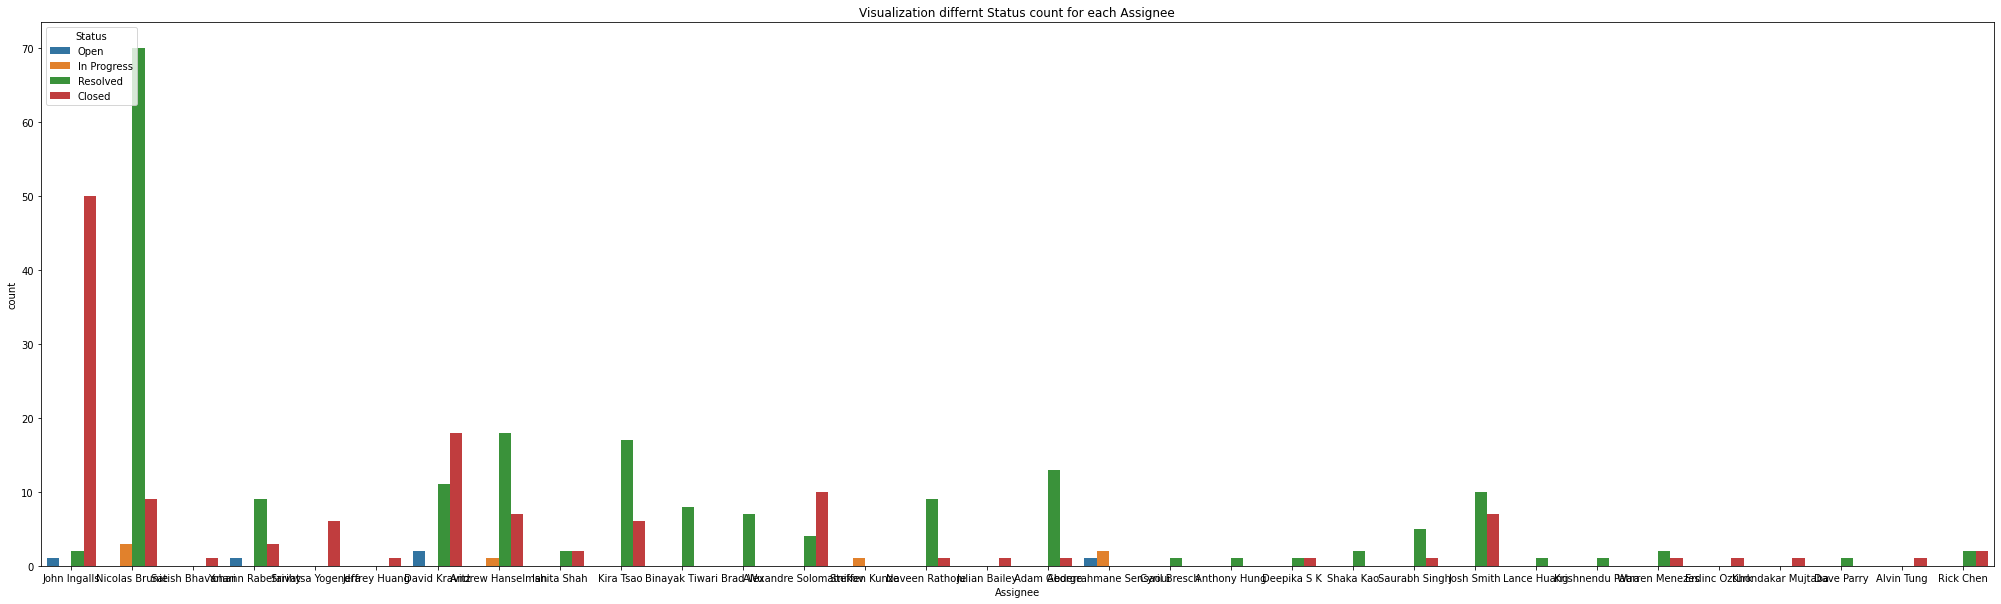

In [ ]:
plt.figure(figsize=(35,10))
plt.title("Visualization differnt Status count for each Assignee")
plt.xlabel("Assignee Names")
plt.ylabel("Status count")
sns.countplot(x="Assignee",data=data,hue='Status')

**counting the records of each Assignee based on Priority and Status**

In [ ]:
df.groupby(['Assignee','Priority','Status']).size().reset_index()

,Assignee,Priority,Status,0
0,Abderrahmane Sensaoui,High,In Progress,1
1,Abderrahmane Sensaoui,Medium,In Progress,1
2,Abderrahmane Sensaoui,Medium,Open,1
3,Adam George,High,Resolved,1
4,Adam George,Low,Resolved,2
...,...,...,...,...
69,Yohann Rabefarihy,Low,Resolved,3
70,Yohann Rabefarihy,Medium,Closed,2
71,Yohann Rabefarihy,Medium,Resolved,6
72,Yohann Rabefarihy,Showstopper,Closed,1


**performing label encoding on Status and Priority column**

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['Status'] = label_encoder.fit_transform(data['Status'])
data['Priority'] = label_encoder.fit_transform(data['Priority'])

**defining a function to perform one hot encoding**

In [ ]:
def onehot(ft,dataset):
    label = [x for x in dataset[ft].value_counts().head(10).index]
    for i in label:
        dataset[i] = np.where(dataset[ft] ==i,1,0)

**performing one hot encoding with many categories on Assignee column**

In [ ]:
onehot('Assignee',data)

In [ ]:
data.head()

,Summary,Issue Type,Status,Priority,Assignee,Created,Description,Comment,Nicolas Brunie,John Ingalls,David Kravitz,Andrew Hanselman,Kira Tsao,Josh Smith,Alexandre Solomatnikov,Adam George,Yohann Rabefarihy,Naveen Rathore
0,LSU FV: Store cross cache misaligned with 2nd ...,Bug,2,3,John Ingalls,9/27/2022 20:41,"Hi John, \n\nI am observing a fail for followi...",NaN,0,1,0,0,0,0,0,0,0,0
1,[TGV] Assertion Failure: ROB Retire Hang aroun...,Bug,1,3,Nicolas Brunie,9/27/2022 8:07,*Debug info* \nwhile tracing back we find that...,27/Sep/22 8:23 AM;6065017e90e3950069cf01c5;Whi...,1,0,0,0,0,0,0,0,0,0
5,[TGV] complex vrgather deadlock when tail+mask...,Bug,1,3,Nicolas Brunie,9/27/2022 6:02,"*Error::*\n\nError: ""/scratch/naverath/sep-27/...",27/Sep/22 8:24 AM;6065017e90e3950069cf01c5;Sim...,1,0,0,0,0,0,0,0,0,0
7,[TGV] Correlation: Look into vfmerge latency,Bug,1,0,Nicolas Brunie,9/27/2022 3:05,According to the miscorrelation study [https:/...,27/Sep/22 3:19 AM;61aaae1d9615eb006f5ff922;[~a...,1,0,0,0,0,0,0,0,0,0
20,[TGV]:: vsetvli instruction not retaining prev...,Bug,3,3,Nicolas Brunie,9/26/2022 6:50,*Error::*\n\n\[COSIM-ERROR]\[0] COSIM VS RTL V...,26/Sep/22 9:48 AM;6065017e90e3950069cf01c5;I t...,1,0,0,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['Summary', 'Issue Type', 'Status', 'Priority', 'Assignee', 'Created',
       'Description', 'Comment', 'Nicolas Brunie', 'John Ingalls',
       'David Kravitz', 'Andrew Hanselman', 'Kira Tsao', 'Josh Smith',
       'Alexandre Solomatnikov', 'Adam George', 'Yohann Rabefarihy',
       'Naveen Rathore'],
      dtype='object')

**Reading the Created column**

In [ ]:
data['Created']

0      9/27/2022 20:41
1       9/27/2022 8:07
5       9/27/2022 6:02
7       9/27/2022 3:05
20      9/26/2022 6:50
            ...       
992    3/14/2022 14:35
993    3/14/2022 13:37
995     3/11/2022 8:55
996    3/10/2022 17:27
999      3/9/2022 9:21
Name: Created, Length: 340, dtype: object

**Extracting the Date and Time from created column and storing them in Date and Created_Time column**

In [ ]:
data['Date'] = pd.to_datetime(data['Created']).dt.date
data['Creatd_Time'] = pd.to_datetime(data['Created']).dt.time

In [ ]:
data['Date']

0      2022-09-27
1      2022-09-27
5      2022-09-27
7      2022-09-27
20     2022-09-26
          ...    
992    2022-03-14
993    2022-03-14
995    2022-03-11
996    2022-03-10
999    2022-03-09
Name: Date, Length: 340, dtype: object

In [ ]:
from datetime import datetime as dt

In [ ]:
data['Creatd_Time']

0      20:41:00
1      08:07:00
5      06:02:00
7      03:05:00
20     06:50:00
         ...   
992    14:35:00
993    13:37:00
995    08:55:00
996    17:27:00
999    09:21:00
Name: Creatd_Time, Length: 340, dtype: object

**Extraacting the Day and Month from Date column**

In [ ]:
data["created_day"] = pd.to_datetime(data.Date, format="%Y-%m-%d").dt.day
data["created_month"] = pd.to_datetime(data.Date, format="%Y-%m-%d").dt.month

In [ ]:
data

,Summary,Issue Type,Status,Priority,Assignee,Created,Description,Comment,Nicolas Brunie,John Ingalls,...,Kira Tsao,Josh Smith,Alexandre Solomatnikov,Adam George,Yohann Rabefarihy,Naveen Rathore,Date,Creatd_Time,created_day,created_month
0,LSU FV: Store cross cache misaligned with 2nd ...,Bug,2,3,John Ingalls,9/27/2022 20:41,"Hi John, \n\nI am observing a fail for followi...",NaN,0,1,...,0,0,0,0,0,0,2022-09-27,20:41:00,27,9
1,[TGV] Assertion Failure: ROB Retire Hang aroun...,Bug,1,3,Nicolas Brunie,9/27/2022 8:07,*Debug info* \nwhile tracing back we find that...,27/Sep/22 8:23 AM;6065017e90e3950069cf01c5;Whi...,1,0,...,0,0,0,0,0,0,2022-09-27,08:07:00,27,9
5,[TGV] complex vrgather deadlock when tail+mask...,Bug,1,3,Nicolas Brunie,9/27/2022 6:02,"*Error::*\n\nError: ""/scratch/naverath/sep-27/...",27/Sep/22 8:24 AM;6065017e90e3950069cf01c5;Sim...,1,0,...,0,0,0,0,0,0,2022-09-27,06:02:00,27,9
7,[TGV] Correlation: Look into vfmerge latency,Bug,1,0,Nicolas Brunie,9/27/2022 3:05,According to the miscorrelation study [https:/...,27/Sep/22 3:19 AM;61aaae1d9615eb006f5ff922;[~a...,1,0,...,0,0,0,0,0,0,2022-09-27,03:05:00,27,9
20,[TGV]:: vsetvli instruction not retaining prev...,Bug,3,3,Nicolas Brunie,9/26/2022 6:50,*Error::*\n\n\[COSIM-ERROR]\[0] COSIM VS RTL V...,26/Sep/22 9:48 AM;6065017e90e3950069cf01c5;I t...,1,0,...,0,0,0,0,0,0,2022-09-26,06:50:00,26,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,[TGV] In correct slide operation popping up again,Bug,3,3,Josh Smith,3/14/2022 14:35,"I see incorrect slide of data happening on, vs...",15/Mar/22 6:28 AM;5fd15143b4a74900763834e0;Ass...,0,0,...,0,1,0,0,0,0,2022-03-14,14:35:00,14,3
993,VMV.x.s copying 64 bits instead of 32 bits of ...,Bug,3,3,Josh Smith,3/14/2022 13:37,I see vmv.s.x moving 64 bits of data to the sc...,14/Mar/22 3:17 PM;5fd15143b4a74900763834e0;I n...,0,0,...,0,1,0,0,0,0,2022-03-14,13:37:00,14,3
995,Assertion issue regarding check while Mallard ...,Bug,3,3,Josh Smith,3/11/2022 8:55,The RDU in Mallard has an assertion to check t...,15/Mar/22 3:55 PM;5acffeafaa802f2a797a955c;Mer...,0,0,...,0,1,0,0,0,0,2022-03-11,08:55:00,11,3
996,[TGV] Sequencer credit count assertion on u8_m...,Bug,0,3,Alexandre Solomatnikov,3/10/2022 17:27,"m running into an assertion, when we are initi...",15/Mar/22 12:49 PM;557058:e51f5c3d-42d7-403f-9...,0,0,...,0,0,1,0,0,0,2022-03-10,17:27:00,10,3


In [ ]:
data.Description

0      Hi John, \n\nI am observing a fail for followi...
1      *Debug info* \nwhile tracing back we find that...
5      *Error::*\n\nError: "/scratch/naverath/sep-27/...
7      According to the miscorrelation study [https:/...
20     *Error::*\n\n\[COSIM-ERROR]\[0] COSIM VS RTL V...
                             ...                        
992    I see incorrect slide of data happening on, vs...
993    I see vmv.s.x moving 64 bits of data to the sc...
995    The RDU in Mallard has an assertion to check t...
996    m running into an assertion, when we are initi...
999    The following line is generated in a different...
Name: Description, Length: 340, dtype: object

In [ ]:
data.isnull().sum()

Summary                    0
Issue Type                 0
Status                     0
Priority                   0
Assignee                   0
Created                    0
Description                1
Comment                   45
Nicolas Brunie             0
John Ingalls               0
David Kravitz              0
Andrew Hanselman           0
Kira Tsao                  0
Josh Smith                 0
Alexandre Solomatnikov     0
Adam George                0
Yohann Rabefarihy          0
Naveen Rathore             0
Date                       0
Creatd_Time                0
created_day                0
created_month              0
dtype: int64